## Part A 
----------------------------------------------------------------------------------

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 1 : </b>
       Importing Libraries
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 2 : </b>
       Load Dataset
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [2]:
dataset = pd.read_csv('house_data.csv') 

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 3 : </b>
       Define X and Y for simple linear regression 
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [4]:

X = dataset.iloc[: , 5:6].values


y = dataset.iloc[: , 2:3].values


In [5]:
X.shape

(21613, 1)

In [6]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [7]:
m = len(y)
m
print(X[5 , 0])

5420


In [8]:
def featureNormalization(X):
    X_norm = X
    mu = np.zeros((1 , len(X[0])));
    sigma = np.zeros((1 , len(X[0])));
    
    for i in range(len(X[0])):
        getSum = 0
        for j in range(len(X)):
            getSum = getSum + X[j , i]
            
        mean = 0
        mean = getSum / len(X)
        mu[0 , i] = mean
        
    #Calaculate the standard deviation
    for i in range(len(X[0])):
        sigma[0 , i] = np.std(X[: , i], dtype = np.float64)
        
    #Calaculate X_norm
    for i in range(len(X[0])):
        for j in range(len(X)):
            X_norm[j , i] = ( X[j , i] - mu[0 , i] ) / sigma[0 , i]
            
    return X_norm

X = featureNormalization(X)

X

array([[ 0],
       [ 0],
       [-1],
       ...,
       [-1],
       [ 0],
       [-1]], dtype=int64)

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 3 : </b>
       Plotting the data 
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

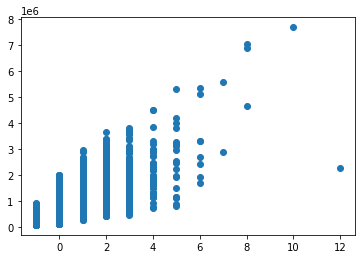

In [9]:
plt.scatter(X , y)

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 4 : </b>
       Adding ones column to X
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [10]:
X = np.concatenate((np.ones((m,1), dtype=int), X), axis=1) 
X.shape

(21613, 2)

In [11]:
theta = np.zeros((2 , 1))
theta

array([[0.],
       [0.]])

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 4 : </b>
       Implement the model 
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [12]:
iterations = 1500
alpha = 0.01
print(X.shape)

(21613, 2)


In [13]:
def hypothesis(X , theta):
    return X @ theta

In [14]:
print(y)

[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


In [15]:
print(hypothesis(X , theta))

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [16]:
def computeCostFunction(X , y , theta):
    h = hypothesis(X , theta)
    
    
    return sum(np.power((h - y) , 2)) / (2 * m)

print(computeCostFunction(X , y , theta))

[2.13235672e+11]


In [17]:
J = computeCostFunction(X , y , theta)
print("With theta = [[0] , [0]] costFunction = " , J)


With theta = [[0] , [0]] costFunction =  [2.13235672e+11]


In [18]:
theta = np.ones((2 , 1))
J = computeCostFunction(X , y , theta)
print("With theta = [[-1] , [2]] costFunction = " , J)



With theta = [[-1] , [2]] costFunction =  [2.13234916e+11]


In [30]:
""" Calaculate the accuracy """

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [19]:
theta = np.zeros((2 , 1))

#print(X[: , 1].reshape(21613 , 1))
def gradient_descent(X , y , alpha , num_iter , theta):
    
    J_History = np.zeros((num_iter , 1))
    
    for i in range(num_iter):        
        """ Calculate hypothesis function """
        h = hypothesis(X , theta)
        print("Error in iteration-" , i , " = " , h)
        
        """ Calculate the dervatie of Gradient Descent """
        theta_zero = theta[0] - alpha * sum(h - y) * (1/m)
        #print((h-y).shape)# 21613 * 1
        #print(X[: , 1].shape)
        theta_one = theta[1] - alpha * (X[: , 1].T @ (h-y)) * (1/m)
        
       
        
        theta[0] = theta_zero
        theta[1] = theta_one
        
        J_History[i] = computeCostFunction(X , y , theta)
        
    return theta , J_History
    

In [20]:
new_theta , J_History = gradient_descent(X  , y , alpha , iterations , theta)

Error in iteration- 0  =  [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Error in iteration- 1  =  [[5400.88141767]
 [5400.88141767]
 [3250.29457641]
 ...
 [3250.29457641]
 [5400.88141767]
 [3250.29457641]]
Error in iteration- 2  =  [[10746.11518502]
 [10746.11518502]
 [ 6460.19272587]
 ...
 [ 6460.19272587]
 [10746.11518502]
 [ 6460.19272587]]
Error in iteration- 3  =  [[16036.26940064]
 [16036.26940064]
 [ 9630.14117179]
 ...
 [ 9630.14117179]
 [16036.26940064]
 [ 9630.14117179]]
Error in iteration- 4  =  [[21271.90638961]
 [21271.90638961]
 [12760.58192549]
 ...
 [12760.58192549]
 [21271.90638961]
 [12760.58192549]]
Error in iteration- 5  =  [[26453.58276207]
 [26453.58276207]
 [15851.95233483]
 ...
 [15851.95233483]
 [26453.58276207]
 [15851.95233483]]
Error in iteration- 6  =  [[31581.84947121]
 [31581.84947121]
 [18904.68513239]
 ...
 [18904.68513239]
 [31581.84947121]
 [18904.68513239]]
Error in iteration- 7  =  [[36657.25187056]
 [36657.25187056]
 [21919.20848311]
 ...
 [21919.20848

Error in iteration- 58  =  [[236591.23919492]
 [236591.23919492]
 [133730.90588927]
 ...
 [133730.90588927]
 [236591.23919492]
 [133730.90588927]]
Error in iteration- 59  =  [[239547.82439194]
 [239547.82439194]
 [135249.7973006 ]
 ...
 [135249.7973006 ]
 [239547.82439194]
 [135249.7973006 ]]
Error in iteration- 60  =  [[242473.74815486]
 [242473.74815486]
 [136747.72455584]
 ...
 [136747.72455584]
 [242473.74815486]
 [136747.72455584]]
Error in iteration- 61  =  [[245369.32448774]
 [245369.32448774]
 [138224.92808222]
 ...
 [138224.92808222]
 [245369.32448774]
 [138224.92808222]]
Error in iteration- 62  =  [[248234.86419855]
 [248234.86419855]
 [139681.64573113]
 ...
 [139681.64573113]
 [248234.86419855]
 [139681.64573113]]
Error in iteration- 63  =  [[251070.67493156]
 [251070.67493156]
 [141118.11280486]
 ...
 [141118.11280486]
 [251070.67493156]
 [141118.11280486]]
Error in iteration- 64  =  [[253877.06119949]
 [253877.06119949]
 [142534.56208319]
 ...
 [142534.56208319]
 [253877.0

Error in iteration- 120  =  [[372202.65479497]
 [372202.65479497]
 [196072.72134017]
 ...
 [196072.72134017]
 [372202.65479497]
 [196072.72134017]]
Error in iteration- 121  =  [[373747.29136995]
 [373747.29136995]
 [196662.38846054]
 ...
 [196662.38846054]
 [373747.29136995]
 [196662.38846054]]
Error in iteration- 122  =  [[375275.75385296]
 [375275.75385296]
 [197242.00330432]
 ...
 [197242.00330432]
 [375275.75385296]
 [197242.00330432]]
Error in iteration- 123  =  [[376788.20865   ]
 [376788.20865   ]
 [197811.68825403]
 ...
 [197811.68825403]
 [376788.20865   ]
 [197811.68825403]]
Error in iteration- 124  =  [[378284.82046943]
 [378284.82046943]
 [198371.56434932]
 ...
 [198371.56434932]
 [378284.82046943]
 [198371.56434932]]
Error in iteration- 125  =  [[379765.75233931]
 [379765.75233931]
 [198921.75130112]
 ...
 [198921.75130112]
 [379765.75233931]
 [198921.75130112]]
Error in iteration- 126  =  [[381231.16562436]
 [381231.16562436]
 [199462.36750558]
 ...
 [199462.36750558]
 [3

Error in iteration- 179  =  [[440378.43896763]
 [440378.43896763]
 [217095.59206392]
 ...
 [217095.59206392]
 [440378.43896763]
 [217095.59206392]]
Error in iteration- 180  =  [[441205.38523041]
 [441205.38523041]
 [217263.67481339]
 ...
 [217263.67481339]
 [441205.38523041]
 [217263.67481339]]
Error in iteration- 181  =  [[442023.55994931]
 [442023.55994931]
 [217427.02771706]
 ...
 [217427.02771706]
 [442023.55994931]
 [217427.02771706]]
Error in iteration- 182  =  [[442833.05391971]
 [442833.05391971]
 [217585.71395853]
 ...
 [217585.71395853]
 [442833.05391971]
 [217585.71395853]]
Error in iteration- 183  =  [[443633.957008  ]
 [443633.957008  ]
 [217739.79600453]
 ...
 [217739.79600453]
 [443633.957008  ]
 [217739.79600453]]
Error in iteration- 184  =  [[444426.35816102]
 [444426.35816102]
 [217889.33561264]
 ...
 [217889.33561264]
 [444426.35816102]
 [217889.33561264]]
Error in iteration- 185  =  [[445210.34541542]
 [445210.34541542]
 [218034.39383878]
 ...
 [218034.39383878]
 [4

Error in iteration- 235  =  [[475388.09146916]
 [475388.09146916]
 [220739.23089745]
 ...
 [220739.23089745]
 [475388.09146916]
 [220739.23089745]]
Error in iteration- 236  =  [[475841.03900708]
 [475841.03900708]
 [220722.40387623]
 ...
 [220722.40387623]
 [475841.03900708]
 [220722.40387623]]
Error in iteration- 237  =  [[476289.09908198]
 [476289.09908198]
 [220703.46700345]
 ...
 [220703.46700345]
 [476289.09908198]
 [220703.46700345]]
Error in iteration- 238  =  [[476732.32268514]
 [476732.32268514]
 [220682.45316377]
 ...
 [220682.45316377]
 [476732.32268514]
 [220682.45316377]]
Error in iteration- 239  =  [[477170.76028413]
 [477170.76028413]
 [220659.3948507 ]
 ...
 [220659.3948507 ]
 [477170.76028413]
 [220659.3948507 ]]
Error in iteration- 240  =  [[477604.46182816]
 [477604.46182816]
 [220634.32417096]
 ...
 [220634.32417096]
 [477604.46182816]
 [220634.32417096]]
Error in iteration- 241  =  [[478033.47675334]
 [478033.47675334]
 [220607.27284858]
 ...
 [220607.27284858]
 [4

Error in iteration- 291  =  [[494466.33585205]
 [494466.33585205]
 [217330.5596215 ]
 ...
 [217330.5596215 ]
 [494466.33585205]
 [217330.5596215 ]]
Error in iteration- 292  =  [[494711.36498627]
 [494711.36498627]
 [217236.78765774]
 ...
 [217236.78765774]
 [494711.36498627]
 [217236.78765774]]
Error in iteration- 293  =  [[494953.68564869]
 [494953.68564869]
 [217142.24822347]
 ...
 [217142.24822347]
 [494953.68564869]
 [217142.24822347]]
Error in iteration- 294  =  [[495193.32640316]
 [495193.32640316]
 [217046.95776824]
 ...
 [217046.95776824]
 [495193.32640316]
 [217046.95776824]]
Error in iteration- 295  =  [[495430.31551865]
 [495430.31551865]
 [216950.93253125]
 ...
 [216950.93253125]
 [495430.31551865]
 [216950.93253125]]
Error in iteration- 296  =  [[495664.68097227]
 [495664.68097227]
 [216854.18854364]
 ...
 [216854.18854364]
 [495664.68097227]
 [216854.18854364]]
Error in iteration- 297  =  [[495896.45045227]
 [495896.45045227]
 [216756.74163088]
 ...
 [216756.74163088]
 [4

Error in iteration- 350  =  [[505097.04216749]
 [505097.04216749]
 [210934.61199722]
 ...
 [210934.61199722]
 [505097.04216749]
 [210934.61199722]]
Error in iteration- 351  =  [[505222.78922396]
 [505222.78922396]
 [210817.82134235]
 ...
 [210817.82134235]
 [505222.78922396]
 [210817.82134235]]
Error in iteration- 352  =  [[505347.09398609]
 [505347.09398609]
 [210700.94005416]
 ...
 [210700.94005416]
 [505347.09398609]
 [210700.94005416]]
Error in iteration- 353  =  [[505469.97190686]
 [505469.97190686]
 [210583.97548774]
 ...
 [210583.97548774]
 [505469.97190686]
 [210583.97548774]]
Error in iteration- 354  =  [[505591.43827852]
 [505591.43827852]
 [210466.93489121]
 ...
 [210466.93489121]
 [505591.43827852]
 [210466.93489121]]
Error in iteration- 355  =  [[505711.50823429]
 [505711.50823429]
 [210349.82540695]
 ...
 [210349.82540695]
 [505711.50823429]
 [210349.82540695]]
Error in iteration- 356  =  [[505830.19674996]
 [505830.19674996]
 [210232.6540728 ]
 ...
 [210232.6540728 ]
 [5

Error in iteration- 408  =  [[510421.81492317]
 [510421.81492317]
 [204197.70232504]
 ...
 [204197.70232504]
 [510421.81492317]
 [204197.70232504]]
Error in iteration- 409  =  [[510485.12275116]
 [510485.12275116]
 [204084.98435062]
 ...
 [204084.98435062]
 [510485.12275116]
 [204084.98435062]]
Error in iteration- 410  =  [[510547.66336192]
 [510547.66336192]
 [203972.45884655]
 ...
 [203972.45884655]
 [510547.66336192]
 [203972.45884655]]
Error in iteration- 411  =  [[510609.44515895]
 [510609.44515895]
 [203860.1286625 ]
 ...
 [203860.1286625 ]
 [510609.44515895]
 [203860.1286625 ]]
Error in iteration- 412  =  [[510670.47645747]
 [510670.47645747]
 [203747.99659504]
 ...
 [203747.99659504]
 [510670.47645747]
 [203747.99659504]]
Error in iteration- 413  =  [[510730.76548537]
 [510730.76548537]
 [203636.06538829]
 ...
 [203636.06538829]
 [510730.76548537]
 [203636.06538829]]
Error in iteration- 414  =  [[510790.32038404]
 [510790.32038404]
 [203524.33773458]
 ...
 [203524.33773458]
 [5

Error in iteration- 466  =  [[513051.12608172]
 [513051.12608172]
 [198046.36252877]
 ...
 [198046.36252877]
 [513051.12608172]
 [198046.36252877]]
Error in iteration- 467  =  [[513081.44957889]
 [513081.44957889]
 [197948.12921919]
 ...
 [197948.12921919]
 [513081.44957889]
 [197948.12921919]]
Error in iteration- 468  =  [[513111.37187548]
 [513111.37187548]
 [197850.18347136]
 ...
 [197850.18347136]
 [513111.37187548]
 [197850.18347136]]
Error in iteration- 469  =  [[513140.89750836]
 [513140.89750836]
 [197752.52595008]
 ...
 [197752.52595008]
 [513140.89750836]
 [197752.52595008]]
Error in iteration- 470  =  [[513170.0309661 ]
 [513170.0309661 ]
 [197655.15729534]
 ...
 [197655.15729534]
 [513170.0309661 ]
 [197655.15729534]]
Error in iteration- 471  =  [[513198.77668941]
 [513198.77668941]
 [197558.07812264]
 ...
 [197558.07812264]
 [513198.77668941]
 [197558.07812264]]
Error in iteration- 472  =  [[513227.13907171]
 [513227.13907171]
 [197461.28902337]
 ...
 [197461.28902337]
 [5

Error in iteration- 523  =  [[514254.83644816]
 [514254.83644816]
 [192916.96527393]
 ...
 [192916.96527393]
 [514254.83644816]
 [192916.96527393]]
Error in iteration- 524  =  [[514268.2967517 ]
 [514268.2967517 ]
 [192835.57825961]
 ...
 [192835.57825961]
 [514268.2967517 ]
 [192835.57825961]]
Error in iteration- 525  =  [[514281.55017461]
 [514281.55017461]
 [192754.48573213]
 ...
 [192754.48573213]
 [514281.55017461]
 [192754.48573213]]
Error in iteration- 526  =  [[514294.59916778]
 [514294.59916778]
 [192673.68738866]
 ...
 [192673.68738866]
 [514294.59916778]
 [192673.68738866]]
Error in iteration- 527  =  [[514307.44615547]
 [514307.44615547]
 [192593.1829159 ]
 ...
 [192593.1829159 ]
 [514307.44615547]
 [192593.1829159 ]]
Error in iteration- 528  =  [[514320.0935356 ]
 [514320.0935356 ]
 [192512.97199026]
 ...
 [192512.97199026]
 [514320.0935356 ]
 [192512.97199026]]
Error in iteration- 529  =  [[514332.54368007]
 [514332.54368007]
 [192433.05427801]
 ...
 [192433.05427801]
 [5

Error in iteration- 585  =  [[514777.65194184]
 [514777.65194184]
 [188411.55612576]
 ...
 [188411.55612576]
 [514777.65194184]
 [188411.55612576]]
Error in iteration- 586  =  [[514782.05237526]
 [514782.05237526]
 [188347.54330375]
 ...
 [188347.54330375]
 [514782.05237526]
 [188347.54330375]]
Error in iteration- 587  =  [[514786.35667063]
 [514786.35667063]
 [188283.79193414]
 ...
 [188283.79193414]
 [514786.35667063]
 [188283.79193414]]
Error in iteration- 588  =  [[514790.56606181]
 [514790.56606181]
 [188220.30132597]
 ...
 [188220.30132597]
 [514790.56606181]
 [188220.30132597]]
Error in iteration- 589  =  [[514794.68176888]
 [514794.68176888]
 [188157.07078539]
 ...
 [188157.07078539]
 [514794.68176888]
 [188157.07078539]]
Error in iteration- 590  =  [[514798.70499825]
 [514798.70499825]
 [188094.09961574]
 ...
 [188094.09961574]
 [514798.70499825]
 [188094.09961574]]
Error in iteration- 591  =  [[514802.63694282]
 [514802.63694282]
 [188031.3871176 ]
 ...
 [188031.3871176 ]
 [5

Error in iteration- 643  =  [[514906.78987908]
 [514906.78987908]
 [185108.76774981]
 ...
 [185108.76774981]
 [514906.78987908]
 [185108.76774981]]
Error in iteration- 644  =  [[514907.28366333]
 [514907.28366333]
 [185058.71686584]
 ...
 [185058.71686584]
 [514907.28366333]
 [185058.71686584]]
Error in iteration- 645  =  [[514907.7339926 ]
 [514907.7339926 ]
 [185008.88461854]
 ...
 [185008.88461854]
 [514907.7339926 ]
 [185008.88461854]]
Error in iteration- 646  =  [[514908.14150119]
 [514908.14150119]
 [184959.27025197]
 ...
 [184959.27025197]
 [514908.14150119]
 [184959.27025197]]
Error in iteration- 647  =  [[514908.50681594]
 [514908.50681594]
 [184909.87301049]
 ...
 [184909.87301049]
 [514908.50681594]
 [184909.87301049]]
Error in iteration- 648  =  [[514908.83055643]
 [514908.83055643]
 [184860.69213877]
 ...
 [184860.69213877]
 [514908.83055643]
 [184860.69213877]]
Error in iteration- 649  =  [[514909.11333495]
 [514909.11333495]
 [184811.72688182]
 ...
 [184811.72688182]
 [5

Error in iteration- 700  =  [[514881.52273055]
 [514881.52273055]
 [182582.92989508]
 ...
 [182582.92989508]
 [514881.52273055]
 [182582.92989508]]
Error in iteration- 701  =  [[514880.36364797]
 [514880.36364797]
 [182544.1546002 ]
 ...
 [182544.1546002 ]
 [514880.36364797]
 [182544.1546002 ]]
Error in iteration- 702  =  [[514879.18749111]
 [514879.18749111]
 [182505.55612084]
 ...
 [182505.55612084]
 [514879.18749111]
 [182505.55612084]]
Error in iteration- 703  =  [[514877.99457846]
 [514877.99457846]
 [182467.13375853]
 ...
 [182467.13375853]
 [514877.99457846]
 [182467.13375853]]
Error in iteration- 704  =  [[514876.78522455]
 [514876.78522455]
 [182428.88681637]
 ...
 [182428.88681637]
 [514876.78522455]
 [182428.88681637]]
Error in iteration- 705  =  [[514875.55974001]
 [514875.55974001]
 [182390.81459901]
 ...
 [182390.81459901]
 [514875.55974001]
 [182390.81459901]]
Error in iteration- 706  =  [[514874.31843158]
 [514874.31843158]
 [182352.91641267]
 ...
 [182352.91641267]
 [5

Error in iteration- 759  =  [[514792.67442278]
 [514792.67442278]
 [180575.76789039]
 ...
 [180575.76789039]
 [514792.67442278]
 [180575.76789039]]
Error in iteration- 760  =  [[514790.9419889 ]
 [514790.9419889 ]
 [180546.28437881]
 ...
 [180546.28437881]
 [514790.9419889 ]
 [180546.28437881]]
Error in iteration- 761  =  [[514789.20573188]
 [514789.20573188]
 [180516.93941628]
 ...
 [180516.93941628]
 [514789.20573188]
 [180516.93941628]]
Error in iteration- 762  =  [[514787.46579846]
 [514787.46579846]
 [180487.73240942]
 ...
 [180487.73240942]
 [514787.46579846]
 [180487.73240942]]
Error in iteration- 763  =  [[514785.72233332]
 [514785.72233332]
 [180458.66276676]
 ...
 [180458.66276676]
 [514785.72233332]
 [180458.66276676]]
Error in iteration- 764  =  [[514783.97547916]
 [514783.97547916]
 [180429.72989876]
 ...
 [180429.72989876]
 [514783.97547916]
 [180429.72989876]]
Error in iteration- 765  =  [[514782.22537668]
 [514782.22537668]
 [180400.93321779]
 ...
 [180400.93321779]
 [5

Error in iteration- 817  =  [[514689.63663321]
 [514689.63663321]
 [179077.24992454]
 ...
 [179077.24992454]
 [514689.63663321]
 [179077.24992454]]
Error in iteration- 818  =  [[514687.8711636 ]
 [514687.8711636 ]
 [179054.88051804]
 ...
 [179054.88051804]
 [514687.8711636 ]
 [179054.88051804]]
Error in iteration- 819  =  [[514686.10764764]
 [514686.10764764]
 [179032.61840499]
 ...
 [179032.61840499]
 [514686.10764764]
 [179032.61840499]]
Error in iteration- 820  =  [[514684.34614606]
 [514684.34614606]
 [179010.46310219]
 ...
 [179010.46310219]
 [514684.34614606]
 [179010.46310219]]
Error in iteration- 821  =  [[514682.58671857]
 [514682.58671857]
 [178988.41412824]
 ...
 [178988.41412824]
 [514682.58671857]
 [178988.41412824]]
Error in iteration- 822  =  [[514680.82942388]
 [514680.82942388]
 [178966.47100363]
 ...
 [178966.47100363]
 [514680.82942388]
 [178966.47100363]]
Error in iteration- 823  =  [[514679.07431971]
 [514679.07431971]
 [178944.63325065]
 ...
 [178944.63325065]
 [5

Error in iteration- 875  =  [[514591.96103439]
 [514591.96103439]
 [177943.03515512]
 ...
 [177943.03515512]
 [514591.96103439]
 [177943.03515512]]
Error in iteration- 876  =  [[514590.38243504]
 [514590.38243504]
 [177926.14528448]
 ...
 [177926.14528448]
 [514590.38243504]
 [177926.14528448]]
Error in iteration- 877  =  [[514588.80795387]
 [514588.80795387]
 [177909.33760931]
 ...
 [177909.33760931]
 [514588.80795387]
 [177909.33760931]]
Error in iteration- 878  =  [[514587.23760919]
 [514587.23760919]
 [177892.6117468 ]
 ...
 [177892.6117468 ]
 [514587.23760919]
 [177892.6117468 ]]
Error in iteration- 879  =  [[514585.67141882]
 [514585.67141882]
 [177875.96731573]
 ...
 [177875.96731573]
 [514585.67141882]
 [177875.96731573]]
Error in iteration- 880  =  [[514584.10940011]
 [514584.10940011]
 [177859.40393648]
 ...
 [177859.40393648]
 [514584.10940011]
 [177859.40393648]]
Error in iteration- 881  =  [[514582.55156993]
 [514582.55156993]
 [177842.921231  ]
 ...
 [177842.921231  ]
 [5

Error in iteration- 932  =  [[514508.92098448]
 [514508.92098448]
 [177100.90797667]
 ...
 [177100.90797667]
 [514508.92098448]
 [177100.90797667]]
Error in iteration- 933  =  [[514507.59432985]
 [514507.59432985]
 [177088.13724969]
 ...
 [177088.13724969]
 [514507.59432985]
 [177088.13724969]]
Error in iteration- 934  =  [[514506.2722209 ]
 [514506.2722209 ]
 [177075.42931372]
 ...
 [177075.42931372]
 [514506.2722209 ]
 [177075.42931372]]
Error in iteration- 935  =  [[514504.95465658]
 [514504.95465658]
 [177062.78386956]
 ...
 [177062.78386956]
 [514504.95465658]
 [177062.78386956]]
Error in iteration- 936  =  [[514503.64163558]
 [514503.64163558]
 [177050.20061935]
 ...
 [177050.20061935]
 [514503.64163558]
 [177050.20061935]]
Error in iteration- 937  =  [[514502.33315641]
 [514502.33315641]
 [177037.67926653]
 ...
 [177037.67926653]
 [514502.33315641]
 [177037.67926653]]
Error in iteration- 938  =  [[514501.02921737]
 [514501.02921737]
 [177025.21951588]
 ...
 [177025.21951588]
 [5

Error in iteration- 991  =  [[514438.30775671]
 [514438.30775671]
 [176445.72379267]
 ...
 [176445.72379267]
 [514438.30775671]
 [176445.72379267]]
Error in iteration- 992  =  [[514437.2417671 ]
 [514437.2417671 ]
 [176436.18677174]
 ...
 [176436.18677174]
 [514437.2417671 ]
 [176436.18677174]]
Error in iteration- 993  =  [[514436.17998211]
 [514436.17998211]
 [176426.69700529]
 ...
 [176426.69700529]
 [514436.17998211]
 [176426.69700529]]
Error in iteration- 994  =  [[514435.12239251]
 [514435.12239251]
 [176417.25426435]
 ...
 [176417.25426435]
 [514435.12239251]
 [176417.25426435]]
Error in iteration- 995  =  [[514434.06898896]
 [514434.06898896]
 [176407.85832104]
 ...
 [176407.85832104]
 [514434.06898896]
 [176407.85832104]]
Error in iteration- 996  =  [[514433.0197621 ]
 [514433.0197621 ]
 [176398.50894852]
 ...
 [176398.50894852]
 [514433.0197621 ]
 [176398.50894852]]
Error in iteration- 997  =  [[514431.97470244]
 [514431.97470244]
 [176389.20592101]
 ...
 [176389.20592101]
 [5

Error in iteration- 1050  =  [[514382.28114727]
 [514382.28114727]
 [175956.9085979 ]
 ...
 [175956.9085979 ]
 [514382.28114727]
 [175956.9085979 ]]
Error in iteration- 1051  =  [[514381.44562095]
 [514381.44562095]
 [175949.80028264]
 ...
 [175949.80028264]
 [514381.44562095]
 [175949.80028264]]
Error in iteration- 1052  =  [[514380.61366978]
 [514380.61366978]
 [175942.7273857 ]
 ...
 [175942.7273857 ]
 [514380.61366978]
 [175942.7273857 ]]
Error in iteration- 1053  =  [[514379.78528225]
 [514379.78528225]
 [175935.68973344]
 ...
 [175935.68973344]
 [514379.78528225]
 [175935.68973344]]
Error in iteration- 1054  =  [[514378.96044689]
 [514378.96044689]
 [175928.68715303]
 ...
 [175928.68715303]
 [514378.96044689]
 [175928.68715303]]
Error in iteration- 1055  =  [[514378.13915218]
 [514378.13915218]
 [175921.71947249]
 ...
 [175921.71947249]
 [514378.13915218]
 [175921.71947249]]
Error in iteration- 1056  =  [[514377.32138662]
 [514377.32138662]
 [175914.78652061]
 ...
 [175914.786520

Error in iteration- 1110  =  [[514338.08373115]
 [514338.08373115]
 [175587.54001227]
 ...
 [175587.54001227]
 [514338.08373115]
 [175587.54001227]]
Error in iteration- 1111  =  [[514337.44238512]
 [514337.44238512]
 [175582.27590154]
 ...
 [175582.27590154]
 [514337.44238512]
 [175582.27590154]]
Error in iteration- 1112  =  [[514336.8039298 ]
 [514336.8039298 ]
 [175577.03812902]
 ...
 [175577.03812902]
 [514336.8039298 ]
 [175577.03812902]]
Error in iteration- 1113  =  [[514336.16835418]
 [514336.16835418]
 [175571.82656447]
 ...
 [175571.82656447]
 [514336.16835418]
 [175571.82656447]]
Error in iteration- 1114  =  [[514335.53564721]
 [514335.53564721]
 [175566.64107827]
 ...
 [175566.64107827]
 [514335.53564721]
 [175566.64107827]]
Error in iteration- 1115  =  [[514334.90579791]
 [514334.90579791]
 [175561.48154143]
 ...
 [175561.48154143]
 [514334.90579791]
 [175561.48154143]]
Error in iteration- 1116  =  [[514334.27879529]
 [514334.27879529]
 [175556.34782559]
 ...
 [175556.347825

Error in iteration- 1166  =  [[514306.32211308]
 [514306.32211308]
 [175329.92046285]
 ...
 [175329.92046285]
 [514306.32211308]
 [175329.92046285]]
Error in iteration- 1167  =  [[514305.82627014]
 [514305.82627014]
 [175325.94712183]
 ...
 [175325.94712183]
 [514305.82627014]
 [175325.94712183]]
Error in iteration- 1168  =  [[514305.33273563]
 [514305.33273563]
 [175321.99371752]
 ...
 [175321.99371752]
 [514305.33273563]
 [175321.99371752]]
Error in iteration- 1169  =  [[514304.84149991]
 [514304.84149991]
 [175318.06015078]
 ...
 [175318.06015078]
 [514304.84149991]
 [175318.06015078]]
Error in iteration- 1170  =  [[514304.35255334]
 [514304.35255334]
 [175314.1463229 ]
 ...
 [175314.1463229 ]
 [514304.35255334]
 [175314.1463229 ]]
Error in iteration- 1171  =  [[514303.86588633]
 [514303.86588633]
 [175310.25213569]
 ...
 [175310.25213569]
 [514303.86588633]
 [175310.25213569]]
Error in iteration- 1172  =  [[514303.38148933]
 [514303.38148933]
 [175306.37749142]
 ...
 [175306.377491

Error in iteration- 1222  =  [[514281.85293934]
 [514281.85293934]
 [175135.53649957]
 ...
 [175135.53649957]
 [514281.85293934]
 [175135.53649957]]
Error in iteration- 1223  =  [[514281.47230604]
 [514281.47230604]
 [175132.53952382]
 ...
 [175132.53952382]
 [514281.47230604]
 [175132.53952382]]
Error in iteration- 1224  =  [[514281.09348531]
 [514281.09348531]
 [175129.55761775]
 ...
 [175129.55761775]
 [514281.09348531]
 [175129.55761775]]
Error in iteration- 1225  =  [[514280.71646913]
 [514280.71646913]
 [175126.59070607]
 ...
 [175126.59070607]
 [514280.71646913]
 [175126.59070607]]
Error in iteration- 1226  =  [[514280.3412495 ]
 [514280.3412495 ]
 [175123.63871387]
 ...
 [175123.63871387]
 [514280.3412495 ]
 [175123.63871387]]
Error in iteration- 1227  =  [[514279.96781847]
 [514279.96781847]
 [175120.70156661]
 ...
 [175120.70156661]
 [514279.96781847]
 [175120.70156661]]
Error in iteration- 1228  =  [[514279.59616808]
 [514279.59616808]
 [175117.77919009]
 ...
 [175117.779190

Error in iteration- 1280  =  [[514262.53694671]
 [514262.53694671]
 [174984.44868915]
 ...
 [174984.44868915]
 [514262.53694671]
 [174984.44868915]]
Error in iteration- 1281  =  [[514262.24905776]
 [514262.24905776]
 [174982.21203975]
 ...
 [174982.21203975]
 [514262.24905776]
 [174982.21203975]]
Error in iteration- 1282  =  [[514261.96256266]
 [514261.96256266]
 [174979.98665531]
 ...
 [174979.98665531]
 [514261.96256266]
 [174979.98665531]]
Error in iteration- 1283  =  [[514261.677455  ]
 [514261.677455  ]
 [174977.77247937]
 ...
 [174977.77247937]
 [514261.677455  ]
 [174977.77247937]]
Error in iteration- 1284  =  [[514261.39372839]
 [514261.39372839]
 [174975.56945573]
 ...
 [174975.56945573]
 [514261.39372839]
 [174975.56945573]]
Error in iteration- 1285  =  [[514261.11137646]
 [514261.11137646]
 [174973.3775285 ]
 ...
 [174973.3775285 ]
 [514261.11137646]
 [174973.3775285 ]]
Error in iteration- 1286  =  [[514260.83039287]
 [514260.83039287]
 [174971.19664205]
 ...
 [174971.196642

Error in iteration- 1341  =  [[514247.30871881]
 [514247.30871881]
 [174866.7342498 ]
 ...
 [174866.7342498 ]
 [514247.30871881]
 [174866.7342498 ]]
Error in iteration- 1342  =  [[514247.0950134 ]
 [514247.0950134 ]
 [174865.09084298]
 ...
 [174865.09084298]
 [514247.0950134 ]
 [174865.09084298]]
Error in iteration- 1343  =  [[514246.88235556]
 [514246.88235556]
 [174863.45572373]
 ...
 [174863.45572373]
 [514246.88235556]
 [174863.45572373]]
Error in iteration- 1344  =  [[514246.67074032]
 [514246.67074032]
 [174861.8288504 ]
 ...
 [174861.8288504 ]
 [514246.67074032]
 [174861.8288504 ]]
Error in iteration- 1345  =  [[514246.46016275]
 [514246.46016275]
 [174860.21018154]
 ...
 [174860.21018154]
 [514246.46016275]
 [174860.21018154]]
Error in iteration- 1346  =  [[514246.25061794]
 [514246.25061794]
 [174858.59967592]
 ...
 [174858.59967592]
 [514246.25061794]
 [174858.59967592]]
Error in iteration- 1347  =  [[514246.04210097]
 [514246.04210097]
 [174856.99729252]
 ...
 [174856.997292

Error in iteration- 1400  =  [[514236.34075724]
 [514236.34075724]
 [174782.68901065]
 ...
 [174782.68901065]
 [514236.34075724]
 [174782.68901065]]
Error in iteration- 1401  =  [[514236.18104355]
 [514236.18104355]
 [174781.4696245 ]
 ...
 [174781.4696245 ]
 [514236.18104355]
 [174781.4696245 ]]
Error in iteration- 1402  =  [[514236.02211947]
 [514236.02211947]
 [174780.25639314]
 ...
 [174780.25639314]
 [514236.02211947]
 [174780.25639314]]
Error in iteration- 1403  =  [[514235.86398121]
 [514235.86398121]
 [174779.0492856 ]
 ...
 [174779.0492856 ]
 [514235.86398121]
 [174779.0492856 ]]
Error in iteration- 1404  =  [[514235.70662498]
 [514235.70662498]
 [174777.84827102]
 ...
 [174777.84827102]
 [514235.70662498]
 [174777.84827102]]
Error in iteration- 1405  =  [[514235.550047  ]
 [514235.550047  ]
 [174776.65331875]
 ...
 [174776.65331875]
 [514235.550047  ]
 [174776.65331875]]
Error in iteration- 1406  =  [[514235.39424351]
 [514235.39424351]
 [174775.46439826]
 ...
 [174775.464398

Error in iteration- 1458  =  [[514228.27217741]
 [514228.27217741]
 [174721.24483994]
 ...
 [174721.24483994]
 [514228.27217741]
 [174721.24483994]]
Error in iteration- 1459  =  [[514228.1524751 ]
 [514228.1524751 ]
 [174720.33569018]
 ...
 [174720.33569018]
 [514228.1524751 ]
 [174720.33569018]]
Error in iteration- 1460  =  [[514228.03336822]
 [514228.03336822]
 [174719.43113231]
 ...
 [174719.43113231]
 [514228.03336822]
 [174719.43113231]]
Error in iteration- 1461  =  [[514227.91485387]
 [514227.91485387]
 [174718.53114319]
 ...
 [174718.53114319]
 [514227.91485387]
 [174718.53114319]]
Error in iteration- 1462  =  [[514227.79692915]
 [514227.79692915]
 [174717.63569978]
 ...
 [174717.63569978]
 [514227.79692915]
 [174717.63569978]]
Error in iteration- 1463  =  [[514227.67959117]
 [514227.67959117]
 [174716.74477917]
 ...
 [174716.74477917]
 [514227.67959117]
 [174716.74477917]]
Error in iteration- 1464  =  [[514227.56283707]
 [514227.56283707]
 [174715.85835856]
 ...
 [174715.858358

In [21]:
new_theta

array([[514223.72543425],
       [339536.96447305]])

In [22]:
J_History

array([[2.09872884e+11],
       [2.06576102e+11],
       [2.03344013e+11],
       ...,
       [3.78540828e+10],
       [3.78540827e+10],
       [3.78540827e+10]])

In [31]:
""" Predict X with new theta """
y_pred = hypothesis(X , new_theta)
y_pred

accuracy = accuracy_metric(y , y_pred)
print(accuracy)

0.0


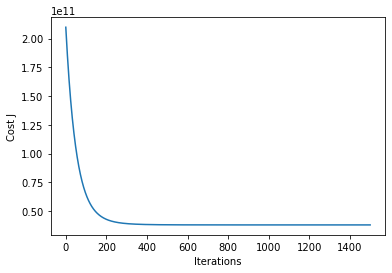

In [24]:
""" with alpha = 0.01 """
plt.plot(J_History)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

In [25]:
new_theta , J_History = gradient_descent(X  , y , 0.1 , iterations , theta)

Error in iteration- 0  =  [[514223.72543425]
 [514223.72543425]
 [174686.7609612 ]
 ...
 [174686.7609612 ]
 [514223.72543425]
 [174686.7609612 ]]
Error in iteration- 1  =  [[514222.75495215]
 [514222.75495215]
 [174679.41147205]
 ...
 [174679.41147205]
 [514222.75495215]
 [174679.41147205]]
Error in iteration- 2  =  [[514221.83290758]
 [514221.83290758]
 [174672.43332371]
 ...
 [174672.43332371]
 [514221.83290758]
 [174672.43332371]]
Error in iteration- 3  =  [[514220.95691745]
 [514220.95691745]
 [174665.80778259]
 ...
 [174665.80778259]
 [514220.95691745]
 [174665.80778259]]
Error in iteration- 4  =  [[514220.12471238]
 [514220.12471238]
 [174659.51705723]
 ...
 [174659.51705723]
 [514220.12471238]
 [174659.51705723]]
Error in iteration- 5  =  [[514219.33413163]
 [514219.33413163]
 [174653.5442513 ]
 ...
 [174653.5442513 ]
 [514219.33413163]
 [174653.5442513 ]]
Error in iteration- 6  =  [[514218.58311826]
 [514218.58311826]
 [174647.87331874]
 ...
 [174647.87331874]
 [514218.58311826

Error in iteration- 59  =  [[514205.32379766]
 [514205.32379766]
 [174548.20714853]
 ...
 [174548.20714853]
 [514205.32379766]
 [174548.20714853]]
Error in iteration- 60  =  [[514205.27786994]
 [514205.27786994]
 [174547.86334783]
 ...
 [174547.86334783]
 [514205.27786994]
 [174547.86334783]]
Error in iteration- 61  =  [[514205.23426506]
 [514205.23426506]
 [174547.53694358]
 ...
 [174547.53694358]
 [514205.23426506]
 [174547.53694358]]
Error in iteration- 62  =  [[514205.19286563]
 [514205.19286563]
 [174547.22705555]
 ...
 [174547.22705555]
 [514205.19286563]
 [174547.22705555]]
Error in iteration- 63  =  [[514205.15356015]
 [514205.15356015]
 [174546.93284806]
 ...
 [174546.93284806]
 [514205.15356015]
 [174546.93284806]]
Error in iteration- 64  =  [[514205.11624276]
 [514205.11624276]
 [174546.65352772]
 ...
 [174546.65352772]
 [514205.11624276]
 [174546.65352772]]
Error in iteration- 65  =  [[514205.08081294]
 [514205.08081294]
 [174546.38834125]
 ...
 [174546.38834125]
 [514205.0

Error in iteration- 118  =  [[514204.4583702 ]
 [514204.4583702 ]
 [174541.73029147]
 ...
 [174541.73029147]
 [514204.4583702 ]
 [174541.73029147]]
Error in iteration- 119  =  [[514204.45622381]
 [514204.45622381]
 [174541.71423152]
 ...
 [174541.71423152]
 [514204.45622381]
 [174541.71423152]]
Error in iteration- 120  =  [[514204.45418602]
 [514204.45418602]
 [174541.69898426]
 ...
 [174541.69898426]
 [514204.45418602]
 [174541.69898426]]
Error in iteration- 121  =  [[514204.45225135]
 [514204.45225135]
 [174541.68450857]
 ...
 [174541.68450857]
 [514204.45225135]
 [174541.68450857]]
Error in iteration- 122  =  [[514204.45041458]
 [514204.45041458]
 [174541.67076539]
 ...
 [174541.67076539]
 [514204.45041458]
 [174541.67076539]]
Error in iteration- 123  =  [[514204.44867076]
 [514204.44867076]
 [174541.65771766]
 ...
 [174541.65771766]
 [514204.44867076]
 [174541.65771766]]
Error in iteration- 124  =  [[514204.44701518]
 [514204.44701518]
 [174541.64533019]
 ...
 [174541.64533019]
 [5

Error in iteration- 177  =  [[514204.417935  ]
 [514204.417935  ]
 [174541.42774672]
 ...
 [174541.42774672]
 [514204.417935  ]
 [174541.42774672]]
Error in iteration- 178  =  [[514204.41783474]
 [514204.41783474]
 [174541.42699655]
 ...
 [174541.42699655]
 [514204.41783474]
 [174541.42699655]]
Error in iteration- 179  =  [[514204.41773956]
 [514204.41773956]
 [174541.42628435]
 ...
 [174541.42628435]
 [514204.41773956]
 [174541.42628435]]
Error in iteration- 180  =  [[514204.41764919]
 [514204.41764919]
 [174541.42560818]
 ...
 [174541.42560818]
 [514204.41764919]
 [174541.42560818]]
Error in iteration- 181  =  [[514204.41756339]
 [514204.41756339]
 [174541.42496624]
 ...
 [174541.42496624]
 [514204.41756339]
 [174541.42496624]]
Error in iteration- 182  =  [[514204.41748193]
 [514204.41748193]
 [174541.42435677]
 ...
 [174541.42435677]
 [514204.41748193]
 [174541.42435677]]
Error in iteration- 183  =  [[514204.4174046 ]
 [514204.4174046 ]
 [174541.42377815]
 ...
 [174541.42377815]
 [5

Error in iteration- 238  =  [[514204.41603712]
 [514204.41603712]
 [174541.41354646]
 ...
 [174541.41354646]
 [514204.41603712]
 [174541.41354646]]
Error in iteration- 239  =  [[514204.4160329 ]
 [514204.4160329 ]
 [174541.41351487]
 ...
 [174541.41351487]
 [514204.4160329 ]
 [174541.41351487]]
Error in iteration- 240  =  [[514204.41602889]
 [514204.41602889]
 [174541.41348489]
 ...
 [174541.41348489]
 [514204.41602889]
 [174541.41348489]]
Error in iteration- 241  =  [[514204.41602508]
 [514204.41602508]
 [174541.41345642]
 ...
 [174541.41345642]
 [514204.41602508]
 [174541.41345642]]
Error in iteration- 242  =  [[514204.41602147]
 [514204.41602147]
 [174541.41342939]
 ...
 [174541.41342939]
 [514204.41602147]
 [174541.41342939]]
Error in iteration- 243  =  [[514204.41601804]
 [514204.41601804]
 [174541.41340373]
 ...
 [174541.41340373]
 [514204.41601804]
 [174541.41340373]]
Error in iteration- 244  =  [[514204.41601479]
 [514204.41601479]
 [174541.41337937]
 ...
 [174541.41337937]
 [5

Error in iteration- 297  =  [[514204.4159576 ]
 [514204.4159576 ]
 [174541.41295147]
 ...
 [174541.41295147]
 [514204.4159576 ]
 [174541.41295147]]
Error in iteration- 298  =  [[514204.4159574 ]
 [514204.4159574 ]
 [174541.41294999]
 ...
 [174541.41294999]
 [514204.4159574 ]
 [174541.41294999]]
Error in iteration- 299  =  [[514204.41595721]
 [514204.41595721]
 [174541.41294859]
 ...
 [174541.41294859]
 [514204.41595721]
 [174541.41294859]]
Error in iteration- 300  =  [[514204.41595703]
 [514204.41595703]
 [174541.41294726]
 ...
 [174541.41294726]
 [514204.41595703]
 [174541.41294726]]
Error in iteration- 301  =  [[514204.41595687]
 [514204.41595687]
 [174541.412946  ]
 ...
 [174541.412946  ]
 [514204.41595687]
 [174541.412946  ]]
Error in iteration- 302  =  [[514204.4159567]
 [514204.4159567]
 [174541.4129448]
 ...
 [174541.4129448]
 [514204.4159567]
 [174541.4129448]]
Error in iteration- 303  =  [[514204.41595655]
 [514204.41595655]
 [174541.41294366]
 ...
 [174541.41294366]
 [514204.

Error in iteration- 358  =  [[514204.41595386]
 [514204.41595386]
 [174541.41292354]
 ...
 [174541.41292354]
 [514204.41595386]
 [174541.41292354]]
Error in iteration- 359  =  [[514204.41595386]
 [514204.41595386]
 [174541.41292348]
 ...
 [174541.41292348]
 [514204.41595386]
 [174541.41292348]]
Error in iteration- 360  =  [[514204.41595385]
 [514204.41595385]
 [174541.41292342]
 ...
 [174541.41292342]
 [514204.41595385]
 [174541.41292342]]
Error in iteration- 361  =  [[514204.41595384]
 [514204.41595384]
 [174541.41292336]
 ...
 [174541.41292336]
 [514204.41595384]
 [174541.41292336]]
Error in iteration- 362  =  [[514204.41595383]
 [514204.41595383]
 [174541.41292331]
 ...
 [174541.41292331]
 [514204.41595383]
 [174541.41292331]]
Error in iteration- 363  =  [[514204.41595383]
 [514204.41595383]
 [174541.41292326]
 ...
 [174541.41292326]
 [514204.41595383]
 [174541.41292326]]
Error in iteration- 364  =  [[514204.41595382]
 [514204.41595382]
 [174541.41292321]
 ...
 [174541.41292321]
 [5

Error in iteration- 415  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292238]
 ...
 [174541.41292238]
 [514204.41595371]
 [174541.41292238]]
Error in iteration- 416  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292237]
 ...
 [174541.41292237]
 [514204.41595371]
 [174541.41292237]]
Error in iteration- 417  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292237]
 ...
 [174541.41292237]
 [514204.41595371]
 [174541.41292237]]
Error in iteration- 418  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292237]
 ...
 [174541.41292237]
 [514204.41595371]
 [174541.41292237]]
Error in iteration- 419  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292236]
 ...
 [174541.41292236]
 [514204.41595371]
 [174541.41292236]]
Error in iteration- 420  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292236]
 ...
 [174541.41292236]
 [514204.41595371]
 [174541.41292236]]
Error in iteration- 421  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292236]
 ...
 [174541.41292236]
 [5

Error in iteration- 472  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292232]
 ...
 [174541.41292232]
 [514204.4159537 ]
 [174541.41292232]]
Error in iteration- 473  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292232]
 ...
 [174541.41292232]
 [514204.4159537 ]
 [174541.41292232]]
Error in iteration- 474  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292232]
 ...
 [174541.41292232]
 [514204.4159537 ]
 [174541.41292232]]
Error in iteration- 475  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292232]
 ...
 [174541.41292232]
 [514204.4159537 ]
 [174541.41292232]]
Error in iteration- 476  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 477  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 478  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 531  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 532  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 533  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 534  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 535  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 536  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 537  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 588  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 589  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 590  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 591  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 592  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 593  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 594  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 646  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 647  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 648  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 649  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 650  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 651  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 652  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 707  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 708  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 709  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 710  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 711  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 712  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 713  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 767  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 768  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 769  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 770  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 771  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 772  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 773  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 827  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 828  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 829  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 830  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 831  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 832  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 833  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 883  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 884  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 885  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 886  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 887  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 888  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 889  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 939  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 940  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 941  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 942  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 943  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 944  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 945  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 999  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1000  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1001  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1002  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1003  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1004  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1005  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.4129223

Error in iteration- 1056  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1057  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1058  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1059  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1060  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1061  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1062  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1111  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1112  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1113  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1114  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1115  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1116  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1117  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1168  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1169  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1170  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1171  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1172  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1173  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1174  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1223  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1224  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1225  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1226  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1227  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1228  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1229  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1283  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1284  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1285  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1286  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1287  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1288  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1289  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1339  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1340  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1341  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1342  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1343  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1344  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1345  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1397  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1398  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1399  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1400  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1401  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1402  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1403  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1455  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1456  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1457  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1458  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1459  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1460  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1461  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

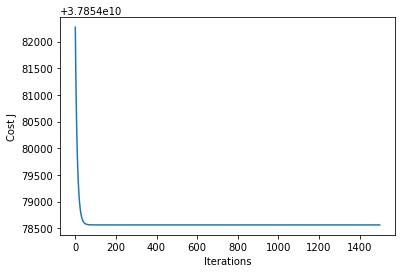

In [26]:
""" with alpha = 0.1 """
plt.plot(J_History)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

In [27]:
new_theta

array([[514204.4159537 ],
       [339663.00303139]])

In [28]:
y_pred = hypothesis(X , new_theta)

In [29]:
y_pred

array([[514204.4159537 ],
       [514204.4159537 ],
       [174541.41292231],
       ...,
       [174541.41292231],
       [514204.4159537 ],
       [174541.41292231]])

In [32]:
accuracy = accuracy_metric(y , y_pred)
print(accuracy)

0.0
